#                                              Assignment - 5

In [1]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
## Code given by sir to understand how to solve the problem
# def circle(t):
#     return np.cos(t), np.sin(t)
# def square(t):
# # """Return x and y coordinates for a square in +/-0.5."""
#     n4 = int(len(t) / 4)
#     ts = np.linspace(-0.5, +0.5, n4)
#     xs = np.concatenate([ts, 0.5*np.ones(n4), ts[::-1], -0.5*np.ones(n4)]) 
#     ys = np.concatenate([xs[n4:], xs[:n4]])
#     return xs, ys

## Explanation : 
- I got some Idea from the code given in the Presentation of this week how to code for making transition.
- Like given above commented function **circle and square** gives us equal no of points on each side for a particular shape that can be used to map one shape with other one.
- As example in square we are dividing the total no of points by 4 so that each side get equal no of points and then can be used to map shapes.
-  Getting idea from the presentation I implemented my code and i am using some of the function from the presentation itself.


# Approach :
- **As the task is to Implement changing different regular shapes , as I carefully observed the video given in the moodle i found that all the points of the different regular shapes are lying on the unit circle.**
- So after observing that, I used the concept of **complex no(finding roots of unity)** for finding the vertex of each shapes.
- so the function **Get_all_corner_points** i am using this function for finding roots of unity for a particular shape and returning it in the form of array of **x_coordinate and y_coordinates**.
- For implementig changing shape we can use different types of mapping like we can map each points on each side to the corresponding points of next shape, But i am using the mapping of corner points of present shape to the next changing shape. I am doing this by splitting the vertex and then mapping to the corresponding vertex of the next shape.
- For mapping I have created tow function 
    - 1. **mapping** - this is used to find the vertex of current shape which is going to be mapped to the next shape and return it in particular format which i am going to explain a little bit later after defining cross_mapping function.
    - 2. **cross_mapping** - This is used to find the vertex of the next shape which is going to be mapped to the next shape and return it  in a paricular format .
   -  take example for tansition of triangle to square 
    - let take x1,x2,x3 be x-coordinate corner points of triangle and a1,a2,a3,a4 are the x-coordinate corner points of square.
    so the **mapping function** gives me **[x1,x1,x2,x2,x3,x3,x1]** and **cross_mapping** gives me **[a1,a2,a2,a3,a3,a4,a1] and i am 
    mapping these two array to transient of x-coordinate of one shape to another shape similar steps i have followed for y-coordinate also 
    and then after some steps we will get square from triangle.

    

### Finding corner vertex and mapping function 

In [3]:
# Function for finding the corner points 
def Get_all_corner_points(n):
    points=np.asarray([i for i in range(n)])
    # finding x and y coordinate using finding n-th root unity method
    x_coordinates=np.cos(points*((2*np.pi)/n)) 
    y_coordinates=np.sin(points*((2*np.pi)/n))

    return x_coordinates,y_coordinates
# Mapping function for find the splitted vertex of first shape
def mapping(n):
    x,y=Get_all_corner_points(n) # calling function for finding and stroing all corner_points of given shape

    x_coordinates=[] #x_coordinate storage of splitted vertex
    y_coordinates=[]# y_coordinate storage of splitted vertex


    for ele in x:
        x_coordinates.append(ele) #splitting of x-vertex as per requirement
        x_coordinates.append(ele)

    for ele in y:
        y_coordinates.append(ele) #splitting of y-vertex as per requirement
        y_coordinates.append(ele)

    x_coordinates.append(x[0]) # adding this vertex to close the shape
    y_coordinates.append(y[0])
   
    x_coordinates=np.array(x_coordinates) # changing the list into numpy array
    y_coordinates=np.array(y_coordinates)

    return x_coordinates,y_coordinates


# a,b=mapping(3)
# print(a,b)
# print(type(a),type(b))

# Mapping Function for finding the splitted vertex of second (next) shape
def cross_mapping(n):
    x,y=Get_all_corner_points(n) # calling function for finding and stroing all corner_points of given shape

    x_coordinates=[] #x_coordinate storage of splitted vertex
    y_coordinates=[] # y_coordinate storage of splitted vertex

    # from here splitting of vertex as per requirement of mapping 
    x_coordinates.append(x[0])

    y_coordinates.append(y[0])

    for i in range(1,n-1):
        x_coordinates.append(x[i])
        x_coordinates.append(x[i])
        y_coordinates.append(y[i])
        y_coordinates.append(y[i])

    x_coordinates.append(x[n-1])
    # x_coordinates.append(x[n-1])
    x_coordinates.append(x[0])

    y_coordinates.append(y[n-1])
    # y_coordinates.append(y[n-1])
    y_coordinates.append(y[0])

    x_coordinates=np.array(x_coordinates) # changing the list into numpy array
    y_coordinates=np.array(y_coordinates)
    
    return x_coordinates,y_coordinates  # Returning of splitted vertex 

## suggestion 
- if you are getting some unusual shape it is because you need to restart shape because this plotting of graph takes global variable and it may be happing that some global variable have been changed so you may get some unusual shape transitioning so please restart the kernel if it happens and rerun it it will give proper output.

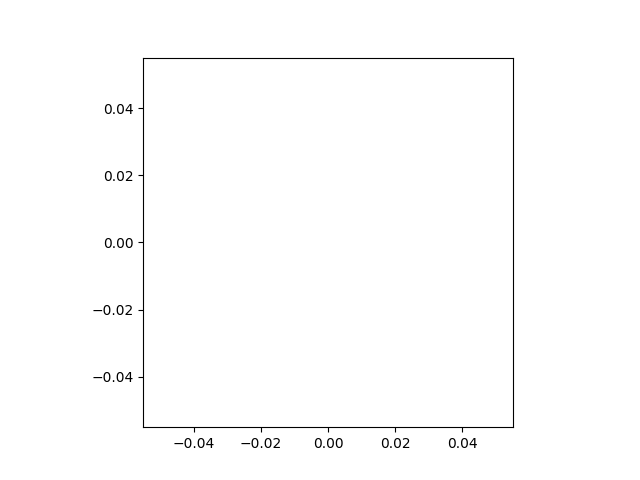

In [4]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r') #creates a red line object with no data and assigns it to the variable ln.
ax.set_aspect('equal',adjustable='box')
col=['red','blue','green','black','orange','orange','black','green','blue','red','grey']
t=4*5*6*7*8
def circle(t):
    return np.cos(t), np.sin(t)

#init() sets the limits of the x and y axes for the plot and returns the line object ln.
def init():
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    return ln,

#update(frame) is a function that is called by the FuncAnimation object for each frame of the animation.
#The frame argument is a float between 1 and 2*(no_of_fig)-1 that determines the current state of the morphing process.
def update(frame):
    xdata, ydata = morph(frame)
    ln.set_data(xdata, ydata)
    ln.set_color(col[int(frame)-1])
    return ln,
# function Return x and  coordinate of morphed shape
def morph(frame):
    # this condition is checking for forward changing of shape or backward changing of shape
    if(frame < num_of_fig):
        n=int(frame)
        x1,y1=mapping(n+2)
        x2,y2=cross_mapping(n+3)
        alpha=frame-n
        # coefficient of morphing is calculated acroding the value of alpha
        xm = alpha * x2 + (1-alpha) * x1
        ym = alpha * y2 + (1-alpha) * y1
        return xm, ym
    else:
        # Backward morphing i.e. change shape in reverse order
        n=int(frame)
        x1,y1=cross_mapping(2*num_of_fig-n + 2)
        x2,y2=mapping(2*num_of_fig-n + 1)
        # changing the value of alpha for reverse order
        alpha=frame-n
        # coefficient of morphing is calculated acroding the value of alpha
        xm = alpha * x2 + (1-alpha) * x1
        ym = alpha * y2 + (1-alpha) * y1
        return xm, ym

num_of_fig=6 #Total no of polygons that will appear in morphing

# xc, yc = circle(np.linspace(0, 2*np.pi, 200))
# plt.plot(xc,yc)

#Rendering the animation
#Speed can be controlled by changing multiplying factor I have used 50
#if you want to slow down change to 200 in frames part
ani = FuncAnimation(fig, update, frames=np.linspace(1, 2*num_of_fig-1, (2*num_of_fig-2)*50),
                    init_func=init, blit=True, interval=10, repeat=False)
plt.show()
